# Assignment 2: Classification

### <font color='red'>Submit before the deadline as no late submission is accepted.</font> 

Deliverables:

- Submit your answers to conceptual questions (described in another file) in a pdf file
- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Write down your discussion in the given cells, denoted as "YOUR DISCUSSION HERE"
- Submit two files: .pdf and .ipynb files to eLearning


This assignment covers Supervised Learning models. In this assignment, you are required to use one clean dataset to train FOUR classification models for discrete targets.


The total score of the implementation part is: 70 pts

In [1]:
NAME = ""

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data
For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. We need to convert the categorical variables into numeric indicators. One way to achieve this is by using the pd.get_dummies function, which will create indicator variables for each category in the data, effectively converting them to a numeric representation that can be used by the algorithms in sklearn.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush = pd.read_csv('mushrooms.csv')
cat_mush = pd.get_dummies(mush)

X_mush = cat_mush.iloc[:,2:]
y_mush = cat_mush.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X_mush, y_mush, random_state=0)

In [4]:
X_train.shape[0]

6093

### Question 1 (10 points)
- Train a DecisionTreeClassifier with default parameters and random_state=0. 
- What are the 5 most important features found by the decision tree?

<BarContainer object of 13 artists>

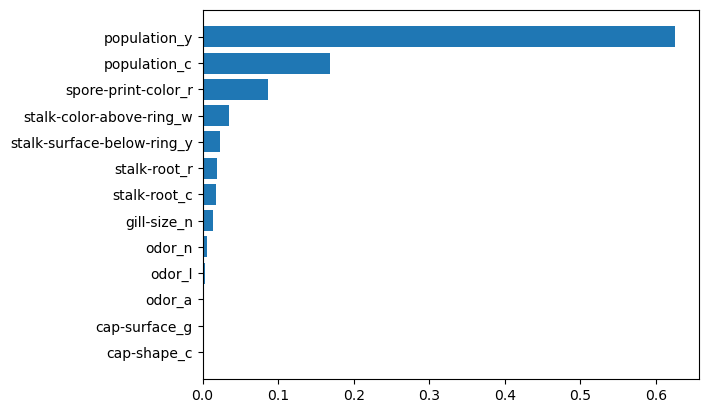

In [5]:
# YOUR CODE HERE (10 points)

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

my_id = dt_clf.feature_importances_ > 0

my_x = cat_mush.columns[2:][my_id]
my_y = dt_clf.feature_importances_[my_id]

my_y.sort()

plt.barh(my_x, my_y)

### Question 2 (10 points)
- Train a Decision Tree model. Set "max_depth" to 6, "min_samples_split" to 2, "max_leaf_nodes" to  10, and random_state to 0.
- Report the test accuracy of the decision tree model.

In [6]:
# YOUR CODE HERE (10 points)

dt_6 = DecisionTreeClassifier(random_state=0, max_depth=6, min_samples_split=2, max_leaf_nodes=10)
dt_6.fit(X_train, y_train)

dt_6.score(X_test, y_test)

1.0

### Question 2 (15 points)
- Train a linear svm classifier with grid search and cross-validation. Set random_state as 0. Let the choices of C be: [0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000]. Use 5-fold cross-validation.
- Report (1) the best C chosen, (2) the test accuracy under the best model, and (3) the mean validation accuracy through the cross-validation process (under the best model).
- Given the choice, discuss briefly: do you think a hard-margin SVM can outperform soft-margin SVM in this case? Why?

In [7]:
# YOUR CODE HERE (10 points)

# GridSearch + CV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

lrsvc = LinearSVC(random_state=0)

lrsvc_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000, 1000000]}

grid_lrsvc = GridSearchCV(lrsvc, lrsvc_params)
grid_lrsvc.fit(X_train, y_train)

grid_lrsvc.best_params_, grid_lrsvc.score(X_test, y_test), grid_lrsvc.best_score_

({'C': 0.1}, 1.0, 1.0)

# YOUR DISCUSSION HERE (5 points)

No, hard-margin SVM cannot outperform soft-margin SVM in this case. If hard margins are preferred, there are likely to be many outliers and misclassifications. Therefore, violations should not be accepted. The distance between support vectors won't be good for optimization.

On the other hand, using grid search, it is observed that the hyperparameter C has a lower value, implying that soft margin is preferred. In the soft margin scenario, we allow misclassification.

### Question 3 (10 points)
- Train
a kernel svm classifier with grid search and cross-validation. Set random_state as 0. Let's apply rbf kernel. Let the choices of C be: [0.1, 1, 10]. Let the choices of gamma be: [0.0001, 0.001, 0.01, 0.1, 1, 10]. Use 5-fold cross-validation.
- Report (1) the best C and gamma chosen, (2) the test accuracy under the best model, and (3) the mean validation accuracy through the cross-validation process (under the best model).
- Note: The code may take up to several minutes to run. 

In [8]:
# YOUR CODE HERE (10 points)

# GridSearch + CV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(random_state=0)

svc_params = {'C': [0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_svc = GridSearchCV(svc, svc_params, n_jobs = 2, cv= 5)
grid_svc.fit(X_train, y_train)

# the best hyperparameter chosen:
print("The best k chosen is", grid_svc.best_params_)

# accuracy for test set of the best model
print("The test accuracy is :", grid_svc.score(X_test, y_test))

# the mean validation accuracy through the cross-validation process (under the best model)
print('The mean validation accuracy is :', grid_svc.best_score_)

The best k chosen is {'C': 1, 'gamma': 0.1}
The test accuracy is : 1.0
The mean validation accuracy is : 1.0


### Question 4. Ensemble Methods - Random Forest (15 points)
- Train a random forest model. Specifically, train 100 decision trees (i.e., n_estimators=100). For each tree, set max_depth = 6, min_samples_split = 2, etc.

In [12]:
# YOUR CODE HERE

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=2, random_state=0)
rfc.fit(X_train, y_train)

print("Training Accuracy is: ", rfc.score(X_train, y_train))
print("Test Accuracy is: ", rfc.score(X_test, y_test))


Training Accuracy is:  0.9988511406532086
Test Accuracy is:  1.0


### Question 5 (10 Points)
- Compare the mean validation score across all models. If we would like to choose one model for prediction based on model performance (i.e., in this case, accuracy), which one would you choose? Explain briefly.

# YOUR DISCUSSION HERE

This dataset shows the score as 1.0 with all models. There are several reasons why a dataset might exhibit perfect accuracy for all models: The dataset may be too small, too simple, or too biased to provide a meaningful evaluation of the models. 


